<a href="https://colab.research.google.com/github/Sushil156/Machine-Learning-Association-Rules/blob/main/Machine%20Learning%20%26%20Association%20Rule%20examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

- [Sushil, Megharaj]
- [20253709]
- [Section 2]
- [Ravan & Eddie]
- [12th Dec, 2021]

### Link to the Google Collab: 
https://colab.research.google.com/drive/1BMFUH-gWSkGvjGOl2U2S9HBV85O2QYdD?usp=sharing

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2021-12-12 19:32:26.731750


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
df1.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

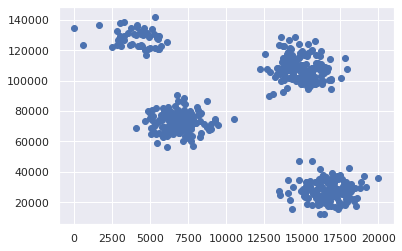

In [ ]:
#Plotting the data
plt.scatter(df1['Savings'],df1['Income'])

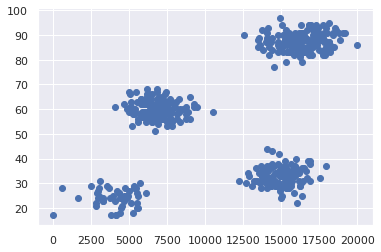

In [ ]:
plt.scatter(df1['Savings'],df1['Age'])

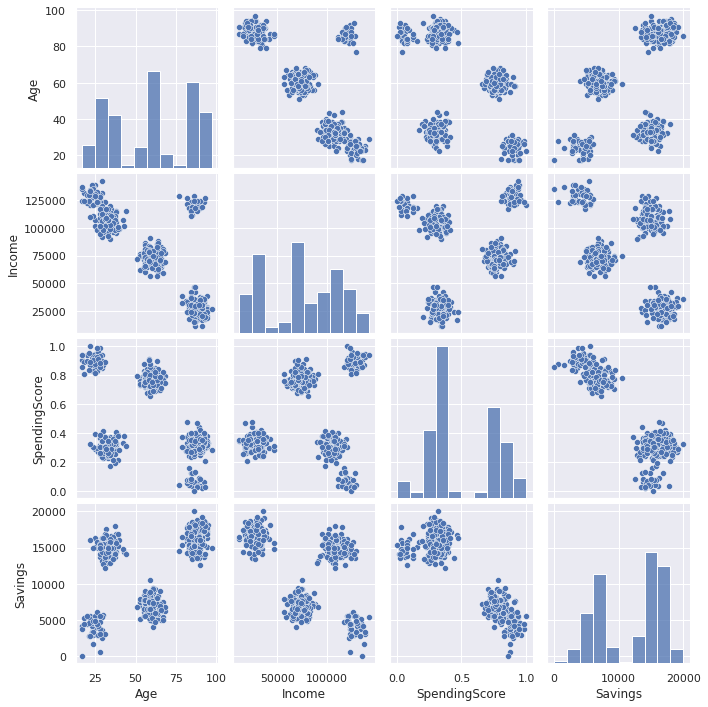

In [ ]:
#Plotting for all combination
sns.pairplot(df1)

### Visually we can see we will mostly likely have 4 clusters

## 1.1: Clustering Algorithm #1

In [ ]:
def score(model, X_input): 

  score_silh = silhouette_score(X_input, model.labels_)
  print("silhouette score = {}".format(round(score_silh,3)))

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(df1) 

In [ ]:
#Implementing Kmeans
km = KMeans(n_clusters=4, random_state=50)
km.fit(X)

wcss_s = km.inertia_

score(km,X)
print("wcss score = {}".format(round(wcss_s,2)))


silhouette score = 0.758
wcss score = 189.7


In [ ]:
#Default parameters for reference
#(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

In [ ]:
#With K = 5 
km = KMeans(n_clusters=5)
km.fit(X)

wcss_s = km.inertia_

score(km,X)
print("wcss score = {}".format(round(wcss_s,2)))

silhouette score = 0.805
wcss score = 66.51


In [ ]:
#With K = 6

km = KMeans(n_clusters=6, random_state=50)
km.fit(X)

wcss_s = km.inertia_

score(km,X)
print("wcss score = {}".format(round(wcss_s,2)))

silhouette score = 0.633
wcss score = 61.14


In [ ]:
#With K = 3

km = KMeans(n_clusters=3, random_state=50)
km.fit(X)

wcss_s = km.inertia_

score(km,X)
print("wcss score = {}".format(round(wcss_s,2)))

silhouette score = 0.696
wcss score = 384.81


In [ ]:
#With K = 7

km = KMeans(n_clusters=7, random_state=50)
km.fit(X)

wcss_s = km.inertia_

score(km,X)
print("wcss score = {}".format(round(wcss_s,2)))

silhouette score = 0.443
wcss score = 57.11


K = 4
silhouette score = 0.76
wcss score = 189.7

K = 5
silhouette score = 0.8
wcss score = 66.51

K = 6 
silhouette score = 0.63
wcss score = 61.14

**From the above we can see that with K = 5 is most optimal with higher silhouette score and lower wcss score**  

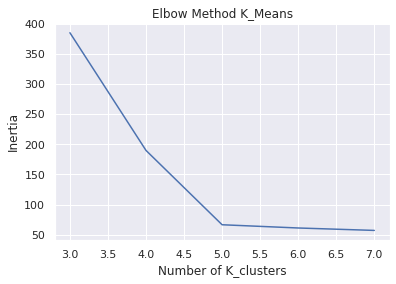

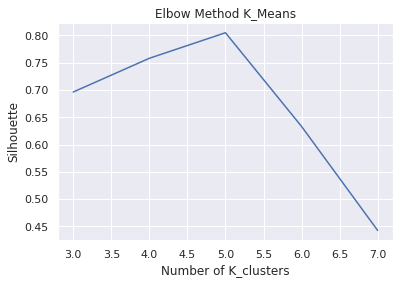

In [ ]:
silhouettes = {}
inertias = {}

for k in range(3,8): 
  km = KMeans(n_clusters=k, random_state=50) 
  km.fit(X)
  inertias[k] = km.inertia_
  silhouettes[k] = silhouette_score(X, km.labels_, metric='euclidean')
  #chs[k] = calinski_harabasz_score(X, km.labels_)

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('Elbow Method K_Means')
plt.xlabel("Number of K_clusters");
plt.ylabel("Inertia");

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('Elbow Method K_Means')
plt.xlabel("Number of K_clusters");
plt.ylabel("Silhouette");

**K = 5  is most optimal as per above elbow method**

## 1.2: Clustering Algorithm #2

In [ ]:
#H-Clust model; Algo #2 
hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hclust.fit(X)

AgglomerativeClustering(n_clusters=4)

In [ ]:
score(hclust,X)

silhouette score = 0.758


In [ ]:
#Dendrogram 
from scipy.cluster.hierarchy import linkage
h = linkage(X, method='ward', metric='euclidean')

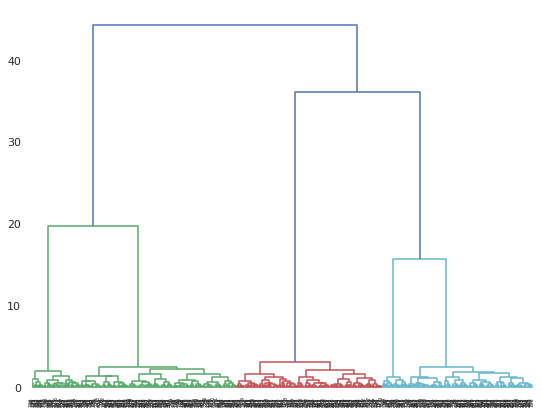

In [ ]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(9,7));
dendrogram(h);

In [ ]:
from scipy.cluster.hierarchy import fcluster
fcluster(h,5,criterion = "maxclust")

array([2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 4, 5, 5, 5, 2, 4, 2, 3, 3, 4, 5, 4,
       2, 3, 4, 1, 1, 2, 3, 2, 2, 2, 3, 2, 5, 2, 3, 2, 5, 5, 2, 3, 1, 2,
       2, 1, 4, 1, 5, 2, 3, 5, 1, 3, 2, 3, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       3, 1, 1, 2, 2, 5, 3, 3, 5, 2, 5, 2, 2, 1, 2, 4, 2, 3, 3, 5, 5, 2,
       2, 2, 2, 2, 1, 3, 2, 1, 5, 2, 2, 5, 5, 1, 5, 1, 5, 3, 3, 5, 5, 2,
       3, 5, 2, 5, 5, 5, 2, 5, 1, 3, 5, 3, 3, 3, 5, 4, 2, 3, 2, 2, 5, 2,
       5, 2, 1, 3, 4, 1, 2, 5, 3, 2, 2, 1, 2, 1, 2, 4, 2, 3, 2, 5, 3, 2,
       3, 4, 5, 2, 3, 2, 5, 3, 2, 5, 3, 5, 3, 2, 5, 2, 3, 2, 5, 2, 3, 2,
       2, 3, 3, 3, 2, 2, 5, 1, 1, 3, 5, 2, 2, 2, 5, 3, 2, 2, 2, 3, 1, 5,
       3, 3, 3, 5, 2, 5, 2, 5, 2, 3, 1, 2, 3, 3, 3, 3, 2, 3, 5, 1, 5, 3,
       2, 2, 5, 3, 5, 1, 5, 2, 2, 3, 2, 2, 3, 2, 2, 2, 5, 2, 5, 5, 1, 2,
       2, 2, 4, 2, 5, 3, 1, 1, 1, 3, 2, 5, 3, 3, 5, 5, 2, 2, 4, 2, 2, 3,
       2, 3, 5, 1, 2, 5, 3, 2, 3, 3, 5, 2, 3, 3, 2, 2, 3, 5, 5, 4, 5, 3,
       3, 5, 4, 3, 3, 1, 2, 5, 5, 2, 5, 3, 3, 5, 2,

In [ ]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hclust.fit(X) 

AgglomerativeClustering(n_clusters=5)

In [ ]:
#With K = 5 
score(hclust,X)

silhouette score = 0.805


In [ ]:
hclust = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
hclust.fit(X)

AgglomerativeClustering(n_clusters=6)

In [ ]:
#With K = 6 
score(hclust,X)

silhouette score = 0.628


In [ ]:
hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hclust.fit(X)

AgglomerativeClustering(n_clusters=4)

In [ ]:
#With K = 4
score(hclust,X)

silhouette score = 0.758


In [ ]:
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hclust.fit(X)

AgglomerativeClustering(n_clusters=3)

In [ ]:
#With K = 3
score(hclust,X)

silhouette score = 0.696


In [ ]:
hclust = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hclust.fit(X)

AgglomerativeClustering(n_clusters=7)

In [ ]:
#With K = 7
score(hclust,X)

silhouette score = 0.426


**Best score observed using h-clust is with K = 5 that of 0.805** 

In [ ]:
#Just checking the silhouette score with 3rd algo DBSCAN 
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=4)
db.fit(X)

DBSCAN(eps=0.3, min_samples=4)

In [ ]:
score(db, X)

silhouette score = 0.765


## 1.3 Model Comparison

K - 5 gives the best Silh_score in both models

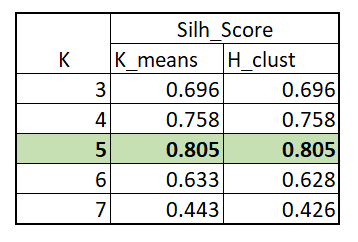

## 1.4 Personas

In [ ]:
from sklearn.metrics import silhouette_samples

In [ ]:
data=df1

In [ ]:
km.labels_

array([1, 1, 1, 1, 3, 4, 1, 3, 3, 3, 0, 2, 2, 2, 1, 0, 1, 3, 3, 0, 2, 0,
       1, 3, 0, 4, 4, 1, 3, 1, 1, 1, 3, 1, 2, 1, 3, 1, 2, 2, 1, 3, 4, 1,
       1, 4, 0, 4, 2, 1, 3, 2, 4, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 4, 4, 1, 1, 2, 3, 3, 2, 1, 2, 1, 1, 4, 1, 0, 1, 3, 3, 2, 2, 1,
       1, 1, 1, 1, 4, 3, 1, 4, 2, 1, 1, 2, 2, 4, 2, 4, 2, 3, 3, 2, 2, 1,
       3, 2, 1, 2, 2, 2, 1, 2, 4, 3, 2, 3, 3, 3, 2, 0, 1, 3, 1, 1, 2, 1,
       2, 1, 4, 3, 0, 4, 1, 2, 3, 1, 1, 4, 1, 4, 1, 0, 1, 3, 1, 2, 3, 1,
       3, 0, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1,
       1, 3, 3, 3, 1, 1, 2, 4, 4, 3, 2, 1, 1, 1, 2, 3, 1, 1, 1, 3, 4, 2,
       3, 3, 3, 2, 1, 2, 1, 2, 1, 3, 4, 1, 3, 3, 3, 3, 1, 3, 2, 4, 2, 3,
       1, 1, 2, 3, 2, 4, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 2, 2, 4, 1,
       1, 1, 0, 1, 2, 3, 4, 4, 4, 3, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 1, 3,
       1, 3, 2, 4, 1, 2, 3, 1, 3, 3, 2, 1, 3, 3, 1, 1, 3, 2, 2, 0, 2, 3,
       3, 2, 0, 3, 3, 4, 1, 2, 2, 1, 2, 3, 3, 2, 1,

In [ ]:
for label in set(km.labels_):
  
    print('\nCluster {}:'.format(label))
    X_tmp = data[km.labels_==label].copy()
    X_tmp.loc['min'] = X_tmp.min() 
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.loc['max'] = X_tmp.max()
    X_tmp.loc['Variance'] = X_tmp.var()
    X_tmp.loc['Skewness'] = X_tmp.skew()
    X_tmp.loc['Kurtosis'] = X_tmp.kurtosis()
    print(X_tmp.tail(6).transpose())
     


Cluster 0:
                         min           mean  ...  Skewness   Kurtosis
Age                77.000000      85.653846  ... -4.636883  12.312669
Income         110582.000000  119583.961538  ...  5.385156  29.998681
SpendingScore       0.000000       0.065748  ...  0.449963  14.293522
Savings         12554.692742   14721.991829  ...  5.385021  29.993902

[4 rows x 6 columns]

Cluster 1:
                        min          mean  ...   Skewness    Kurtosis
Age               51.000000     59.898734  ...  -4.936523   49.726133
Income         56321.000000  72345.993671  ...  12.688504  161.997743
SpendingScore      0.657314      0.770796  ...  -5.997367  155.325033
Savings         4077.658657   6872.172737  ...  12.686023  161.945629

[4 rows x 6 columns]

Cluster 2:
                        min           mean  ...   Skewness    Kurtosis
Age               22.000000      32.692913  ...  -0.273316   12.636501
Income         89598.000000  105142.440945  ...  11.401698  130.997230
Spendin

## Personas: 

**Cluster 0: Rich, Well-planned & Frugal Grandparents:** This group is in similar age range of cluster 2 however has much higher income than that of cluster 2. This group is also very frugal and has the least spending score. Interesting thing to note over here is that despite higher income this group's savings is much lower compared to their income - this indicates that this group may be investing their surplus income in some other form than bank savings. 

**Cluster 1: Old and Unplanned:** This group is above the age of 50 and has lesser income than the previous group. This group should ideally have much higher savings than it currently has for its retirement. Hence they are categorized as old and unplanned. 

**Cluster 2: Young, Rich & Balanced**: This group is young and has an average income of more than 100,000. This group is also cognizant of their spendings and has started saving for its retirement. *As a credit company, Uncle Steve would like to have as many customers as this group as they have good earning capability and is likely to have good credit score.*

**Cluster 3: Self-Sufficient and Balanced grandparents:** This group is in its retirement, has decent income to take care of themselves and is aware of its spendings. 

**Cluster 4: Super-rich, but Careless Millennials:** This is group is the youngest of all clusters, they earn the maximum but has very high spending score. This group has the least savings to income rate amongst all clusters. 


# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 


{eggs} -> {cheese} is likely to have high s/c as both products are bought by most households throughout the year. For Steve this rule may not be that interesting considering high volume of transactions of these two products. However, Steve can create a small recipe information counter at his store which will give out different recipes of eggs/cheese to get more people to buy these two products together, thereby increase in sales.  

Of the total transactions, eggs and cheese would occur on most transaction **indicating high support**. 

It is intuitive to think that people who buy eggs are most likely to buy cheese as most like to pair these two products to meet their daily protein intake, especially post-workout or during breakfast – which **indicates high confidence**. 

## 2.2: A rule that might have reasonably high support but low confidence.

{milk} -> {fish} as both these products are regularly bought by many households, because of which they generally would have reasonably **high support**. However, most people do not like to consume milk and fish together and hence it is expected that people who buy milk (which is large percentage of shoppers) are not very likely to buy fish at the same time – **indicating low confidence**. Uncle Steve can take this insight and keep these two products as far as possible in the store so that customers have a pleasant shopping experience. 

## 2.3: A rule that might have low support and low confidence.

{medicines} -> {flowers} this rule rides on an emotional or general mood of the audience while shopping at the store. As these two are only bought during specific need or for a occasion – this indicates **low support** for this rule. Generally people buy medicines for themselves or for any family member in health stress – indicating not a great mood of people while buying medicines. Flowers on the other hand are bought during completely opposite occasion when people are in happy state or to gift someone special. This indicates **low confidence**, when medicines appear in the list, people are unlikely to buy flowers. Generally, people who come to buy medicines at the store are unlikely to buy anything else – so to make these people wait in queue for a long time on busy days/weekends may not be a great idea. Uncle Steve can create a small cash counter for medicines and emergency products so that these users don’t have to wait for their turn at the cash/payment counter. 

## 2.4: A rule that might have low support and high confidence.

{waffles} -> {ice cream} Both these items are not as regularly bought as cereals, milk, eggs etc. indicating **low support** when compared to total number of transactions at the store. However, the unique combination of a hot waffle and a cold ice cream can be enjoyed in any weather and is generally paired by lot of consumers of waffles. This indicates **high confidence**. Uncle Steve can expect a regular running business by interestingly pairing these two products at the kiosk by offering combo packs of waffles and ice cream so consumers will be intrigued further to buy these two products together. 

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
#Load Libraries 
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

## 3.1: Baseline Model

In [ ]:
#Check NAs / null
df3.isnull().sum().sum()


0

In [ ]:
df3.isna().sum().sum()

0

In [ ]:
pd.DataFrame(df3)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,290-91-5587,F,0,Jamie,Diaz,2,0,2,67539 Walters Hill Suite 945,4XT H23,0,3799,0,6,East Jessetown,Repair,1968-08-25
5996,137-27-2025,M,0,Brian,Abbott,2,1,2,962 Hannah Valleys,81-3897C,0,3641,1,30,Lisatown,NewCar,1969-08-15
5997,061-50-0051,M,0,Benjamin,Medina,1,2,0,397 Williams Crest,303-IAT,0,3192,1,18,New Roberttown,Education,1977-04-12
5998,239-62-7143,M,0,Terry,Young,1,2,4,779 Larry River,R51-30T,0,3784,0,24,North Judithbury,NewCar,1966-06-12


In [ ]:
#Make a Copy of Training Set
X_train_1 = X_train.copy()

In [ ]:
#Drop unimportant features

X_train_1.drop(columns=['UserID',
                   'FirstName',
                   'LastName',
                   'Street',
                   'LicensePlate',
                  'DateOfBirth'], inplace= True)
X_train_1.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation


In [ ]:
#Encoding on Sex
dummy = pd.get_dummies(X_train_1['Sex'])
dummy.head()

X_train_1 = X_train_1.merge(dummy, left_index=True, right_index=True)
X_train_1.head()



,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,F,M
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,0,1
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1,0
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1,0
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1,0
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,0,1


In [ ]:
#Rename F & M
X_train_1 = X_train_1.rename(columns={'F': 'Female', 'M': 'Male'})
X_train_1.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,Female,Male
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,0,1
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1,0
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1,0
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1,0
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,0,1


In [ ]:
#Drop Sex from the training set
X_train_1.drop(columns=['Sex'], inplace= True)

In [ ]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PreviousDefault    4800 non-null   int64 
 1   NumberPets         4800 non-null   int64 
 2   PreviousAccounts   4800 non-null   int64 
 3   ResidenceDuration  4800 non-null   int64 
 4   Amount             4800 non-null   int64 
 5   Married            4800 non-null   int64 
 6   Duration           4800 non-null   int64 
 7   City               4800 non-null   object
 8   Purpose            4800 non-null   object
 9   Female             4800 non-null   uint8 
 10  Male               4800 non-null   uint8 
dtypes: int64(7), object(2), uint8(2)
memory usage: 544.4+ KB


In [ ]:
X_train_1.City.unique()

array(['New Roberttown', 'Ericmouth', 'East Jill', 'Lake Debra',
       'North Judithbury', 'Lisatown', 'West Michael', 'East Jessetown',
       'Port Jesseville', 'Robinsonshire', 'Lake Chad', 'Ramirezstad',
       'Herrerafurt', 'North Noahstad', 'Lake Roberto', 'New Kellystad',
       'Cassandraton', 'New Jessica', 'Jacquelineland', 'Port Keith'],
      dtype=object)

In [ ]:
X_train_1.Purpose.unique()

array(['Household', 'NewCar', 'UsedCar', 'Vacation', 'Other', 'Education',
       'Repair', 'Business'], dtype=object)

In [ ]:
#Create dummy variables for City & Purpose 
X_train_1 = pd.get_dummies(X_train_1)

In [ ]:
X_train_1

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Female,Male,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,2,0,2,3329,0,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5628,0,0,2,2,2996,0,36,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,2,0,3,2470,0,24,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,2,1,2,3745,0,30,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,0,1,3,3549,0,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,3607,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5191,0,2,1,0,3186,0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5226,0,2,1,3,2387,1,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5390,0,1,1,3,3620,0,12,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_1, y_train)

DecisionTreeClassifier()

In [ ]:
#KFold CV
def kfold_(dtc_, X_train_, y_train_):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)


    scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    scores = cross_validate(dtc_, X_train_, y_train_, scoring=scoring, cv=cv)

    # Model Scores
    for k,v in scores.items():
        print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k])))

In [ ]:
kfold_(dtc,X_train_1,y_train)

Mean fit_time :  0.025 (0.002)
Mean score_time :  0.006 (0.001)
Mean test_accuracy :  0.773 (0.011)
Mean test_precision :  0.355 (0.057)
Mean test_recall :  0.399 (0.072)
Mean test_f1_score :  0.374 (0.057)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_1, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
kfold_(log_reg,X_train_1,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean fit_time :  0.150 (0.016)
Mean score_time :  0.010 (0.001)
Mean test_accuracy :  0.826 (0.019)
Mean test_precision :  0.488 (0.190)
Mean test_recall :  0.104 (0.066)
Mean test_f1_score :  0.164 (0.090)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 3.2: Feature engineering

In [ ]:
#Get 'DOB' back in Training 
X_train_1['DateOfBirth'] = pd.to_datetime(X_train.DateOfBirth)

In [ ]:
#Generate 'Age' feature in Training 
from datetime import datetime
today = datetime.today()
X_train_1['Age'] = X_train_1['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_train_1 = X_train_1.drop(['DateOfBirth'], axis=1)

In [ ]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        4800 non-null   int64
 1   NumberPets             4800 non-null   int64
 2   PreviousAccounts       4800 non-null   int64
 3   ResidenceDuration      4800 non-null   int64
 4   Amount                 4800 non-null   int64
 5   Married                4800 non-null   int64
 6   Duration               4800 non-null   int64
 7   Female                 4800 non-null   uint8
 8   Male                   4800 non-null   uint8
 9   City_Cassandraton      4800 non-null   uint8
 10  City_East Jessetown    4800 non-null   uint8
 11  City_East Jill         4800 non-null   uint8
 12  City_Ericmouth         4800 non-null   uint8
 13  City_Herrerafurt       4800 non-null   uint8
 14  City_Jacquelineland    4800 non-null   uint8
 15  City_Lake Chad         4800 non-null

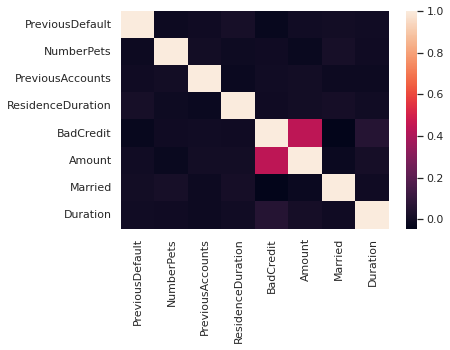

In [ ]:
sns.heatmap(df3.corr())

###Marginal Corelation between Amount and BadCredit (Outcome) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_1, y_train)

DecisionTreeClassifier()

In [ ]:
#KFold CV
def kfold_(dtc_, X_train_, y_train_):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)


    scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    scores = cross_validate(dtc_, X_train_, y_train_, scoring=scoring, cv=cv)

    # Model Scores
    for k,v in scores.items():
        print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k])))

In [ ]:
kfold_(dtc,X_train_1,y_train)

Mean fit_time :  0.023 (0.002)
Mean score_time :  0.006 (0.001)
Mean test_accuracy :  0.843 (0.012)
Mean test_precision :  0.547 (0.053)
Mean test_recall :  0.529 (0.040)
Mean test_f1_score :  0.535 (0.027)


In [ ]:
#Get 'Family Members' feature in Training 
#Considering Pet/s as one of the Family Member; taking +1 for being married 
X_train_1['Family Members'] = X_train_1['NumberPets'] + 1 + X_train_1['Married']

In [ ]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        4800 non-null   int64
 1   NumberPets             4800 non-null   int64
 2   PreviousAccounts       4800 non-null   int64
 3   ResidenceDuration      4800 non-null   int64
 4   Amount                 4800 non-null   int64
 5   Married                4800 non-null   int64
 6   Duration               4800 non-null   int64
 7   Female                 4800 non-null   uint8
 8   Male                   4800 non-null   uint8
 9   City_Cassandraton      4800 non-null   uint8
 10  City_East Jessetown    4800 non-null   uint8
 11  City_East Jill         4800 non-null   uint8
 12  City_Ericmouth         4800 non-null   uint8
 13  City_Herrerafurt       4800 non-null   uint8
 14  City_Jacquelineland    4800 non-null   uint8
 15  City_Lake Chad         4800 non-null

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_1, y_train)

DecisionTreeClassifier()

In [ ]:
#KFold CV
def kfold_(dtc_, X_train_, y_train_):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)


    scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    scores = cross_validate(dtc_, X_train_, y_train_, scoring=scoring, cv=cv)

    # Model Scores
    for k,v in scores.items():
        print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k])))

In [ ]:
kfold_(dtc,X_train_1,y_train)

Mean fit_time :  0.025 (0.004)
Mean score_time :  0.006 (0.000)
Mean test_accuracy :  0.845 (0.013)
Mean test_precision :  0.552 (0.061)
Mean test_recall :  0.550 (0.039)
Mean test_f1_score :  0.548 (0.027)


In [ ]:
#Amount & Duration Feature 
X_train_1['Amt_Duration'] = X_train_1['Amount'] * X_train_1['Duration']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_1, y_train)

DecisionTreeClassifier()

In [ ]:
#KFold CV
def kfold_(dtc_, X_train_, y_train_):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)


    scoring = {'accuracy' : make_scorer(accuracy_score), 'precision' : make_scorer(precision_score),'recall' : make_scorer(recall_score),'f1_score' : make_scorer(f1_score)}

    # Model Evaluation
    scores = cross_validate(dtc_, X_train_, y_train_, scoring=scoring, cv=cv)

    # Model Scores
    for k,v in scores.items():
        print('Mean', k,':',' %.3f (%.3f)' % (np.mean(scores[k]), np.std(scores[k])))

In [ ]:
kfold_(dtc,X_train_1,y_train)

Mean fit_time :  0.028 (0.001)
Mean score_time :  0.006 (0.001)
Mean test_accuracy :  0.841 (0.010)
Mean test_precision :  0.538 (0.069)
Mean test_recall :  0.551 (0.044)
Mean test_f1_score :  0.542 (0.042)


In [ ]:
#Drop Amount and Duration features to check if F1 score improves 

X_train_1.drop(columns=['Amount',
                   'Duration'], inplace= True)
X_train_1.head()

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Female,Male,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation,Age,Family Members,Amt_Duration
3897,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,51,3,39948
5628,0,0,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57,1,107856
1756,0,2,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,46,3,59280
2346,0,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,44,3,112350
2996,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,1,127764


In [ ]:
#Get 'Duration' and 'Amount' back in Training 
X_train_1['Duration'] = X_train.Duration
X_train_1['Amount'] = X_train.Amount
#Drop 'Amt_Duration' feature as it worsens the performance 

X_train_1.drop(columns=['Amt_Duration'], inplace= True)

In [ ]:
X_train_1

,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Female,Male,City_Cassandraton,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Business,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation,Age,Family Members,Duration,Amount
3897,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,51,3,12,3329
5628,0,0,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57,1,36,2996
1756,0,2,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,46,3,24,2470
2346,0,2,1,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,44,3,30,3745
2996,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,45,1,36,3549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,48,2,24,3607
5191,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,47,3,30,3186
5226,0,2,1,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,52,4,36,2387
5390,0,1,1,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,54,2,12,3620


In [ ]:
#Applying Scaling
from sklearn.preprocessing import StandardScaler
X_train_scal = StandardScaler().fit_transform(X_train_1)

In [ ]:
dtc.fit(X_train_scal, y_train)
kfold_(dtc, X_train_scal,y_train)

Mean fit_time :  0.021 (0.002)
Mean score_time :  0.004 (0.000)
Mean test_accuracy :  0.841 (0.017)
Mean test_precision :  0.538 (0.055)
Mean test_recall :  0.533 (0.036)
Mean test_f1_score :  0.534 (0.034)


## *Final comment/observation on 3.2:*
- Our baseline model had a F1 score of 0.374
- With 'Age' feature our F1 score touched 0.535 
- With 'Family Member' feature our F1 score touched 0.548
- With 'Amt_Duration' feature our F1 score touched 0.542
- With std scaling our F1 score touched 0.534

## 3.3: Feature selection

In [ ]:
#Adding "Amt_Duration" back in X_train_1
X_train_1['Amt_Duration'] = X_train_1['Amount'] * X_train_1['Duration']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
sel = SelectKBest(k=10)
sel = sel.fit(X_train_1, y_train)

X_train_fe = sel.transform(X_train_1)

# Get columns to keep and create new dataframe with those only
cols = sel.get_support(indices=True)
X_train_fe_features = X_train_1.iloc[:,cols]

dtc_clf = DecisionTreeClassifier(random_state=30)
dtc_clf.fit(X_train_fe_features, y_train)


DecisionTreeClassifier(random_state=30)

In [ ]:
X_train_fe_features.shape

(4800, 10)

In [ ]:
kfold_(dtc_clf, X_train_fe_features,y_train)

Mean fit_time :  0.017 (0.002)
Mean score_time :  0.006 (0.001)
Mean test_accuracy :  0.836 (0.009)
Mean test_precision :  0.525 (0.060)
Mean test_recall :  0.520 (0.074)
Mean test_f1_score :  0.517 (0.044)


In [ ]:
selected_features = X_train_fe_features.columns

## 3.4: Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_leaf': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]} 

search = GridSearchCV(dtc_clf, params, scoring='f1_macro', cv=10, verbose=1).fit(X_train_fe_features, y_train)
#search = search.fit(X_train_fe, y_train)


Fitting 10 folds for each of 384 candidates, totalling 3840 fits


## F1 score post tuning

In [ ]:
print(search.best_score_)
print(search.best_params_)

0.7799651126915962
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 10, 'splitter': 'random'}


## 3.5: Performance estimation

In [ ]:
#Preprocessing on Test set 

#Make a Copy of Training Set
X_test_1 = X_test.copy() 

X_test_1.drop(columns=['UserID',
                   'FirstName',
                   'LastName',
                   'Street',
                   'LicensePlate',
                  'DateOfBirth'], inplace= True)

#Encoding on Sex
dummy = pd.get_dummies(X_test_1['Sex'])
dummy.head()

X_test_1 = X_test_1.merge(dummy, left_index=True, right_index=True)
X_test_1.head()

#Rename F & M
X_test_1 = X_test_1.rename(columns={'F': 'Female', 'M': 'Male'})
X_test_1.head()

#Drop Sex from the training set
X_test_1.drop(columns=['Sex'], inplace= True)

#Create dummy variables for City & Purpose 
X_test_1 = pd.get_dummies(X_test_1)

#Get 'DOB' back in Training 
X_test_1['DateOfBirth'] = pd.to_datetime(X_test.DateOfBirth)

X_test_1['Age'] = X_test_1['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_test_1 = X_test_1.drop(['DateOfBirth'], axis=1)

#Considering Pet/s as one of the Family Member; taking +1 for being married 
X_test_1['Family Members'] = X_test_1['NumberPets'] + 1 + X_test_1['Married']

#Amount & Duration Feature 
X_test_1['Amt_Duration'] = X_test_1['Amount'] * X_test_1['Duration']


In [ ]:
X_test_final = X_test_1[selected_features]

In [ ]:
y_pred = search.best_estimator_.predict(X_test_final)

## Final Prediction on test set

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       991
           1       0.70      0.66      0.68       209

    accuracy                           0.89      1200
   macro avg       0.82      0.80      0.81      1200
weighted avg       0.89      0.89      0.89      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



If Uncle Steve doesnt use any model then he will have to inspect each turbine everyday and repair the ones which is likely to fail, so that he saves on 20000 repair cost on each turbine. In such a case, he will end up spending CAD 13.26 Million on this activity. 

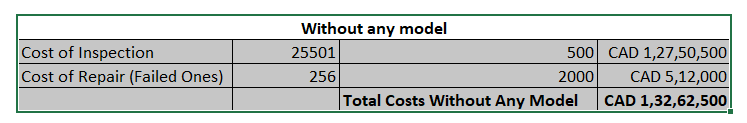



Summary of costs per unit for both models: 
- Per unit cost to repair Actual Fail and Predicted Fail will be 2000 repair + 500 for inspection = CAD 2500
- Per unit cost to repair ones which were actual faulty, but were predicted No Fail will cost Uncle Steve $20000 as these are not predicted correctly 
- Per unit cost to inspect predicted No Fail, but in reality they were good will cost Uncle Steve only the inspection cost of CAD 500 

With Model 1 (RF): Uncle Steve will spend CAD 1.63 Million. 
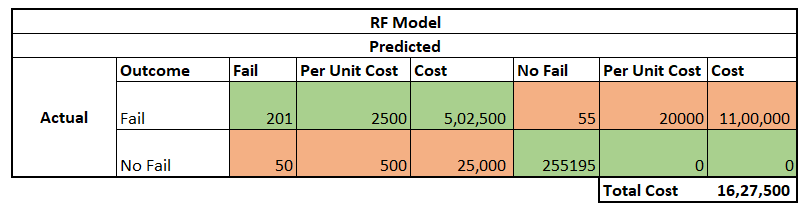

With Model 2 (RNN): Uncle Steve will spend CAD 1.77 Million 
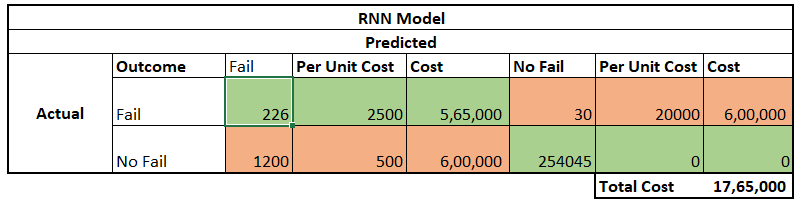

**Summary: RF Model will cost Uncle Steve less cost with a savings of CAD 137,500 versus RNN Model -> 1,765,000 - 1,627,500**

